In [109]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import chosen file as a dataframe, which is regarding
#student demographic and achievement in math courses

input_file = "student-mat.csv"
df = pd.read_csv(input_file, header=0, delimiter=';')

In [51]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [52]:
#review columns
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

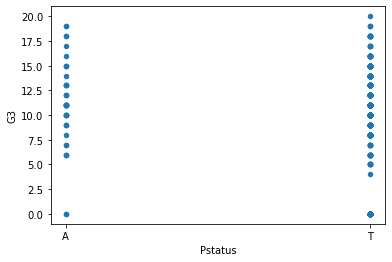

In [84]:
#plot of parental status (apart or together) vs G3 (final grade)
df.plot.scatter(x='Pstatus',y='G3')

<AxesSubplot:xlabel='studytime', ylabel='G3'>

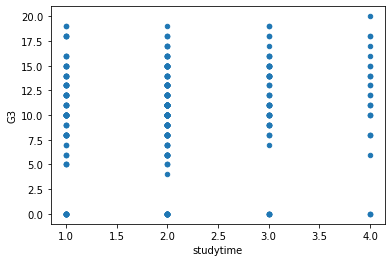

In [66]:
#plot of time spent studying every week vs G3 (final grade)
df.plot.scatter(x='studytime',y='G3')

<AxesSubplot:xlabel='guardian', ylabel='G3'>

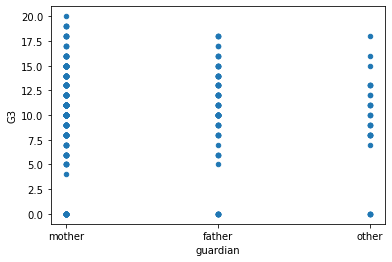

In [67]:
#plot of guardian vs G3 (final grade)
df.plot.scatter(x='guardian',y='G3')

<AxesSubplot:xlabel='failures', ylabel='G3'>

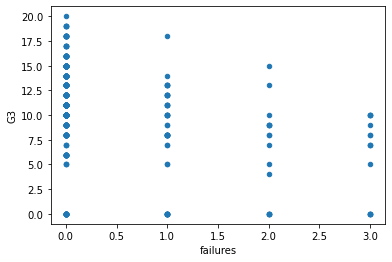

In [70]:
#plot of past class failures vs G3 (final grade)
#some correlation of more failtures with lower final grades
df.plot.scatter(x='failures',y='G3')

<AxesSubplot:xlabel='internet', ylabel='G3'>

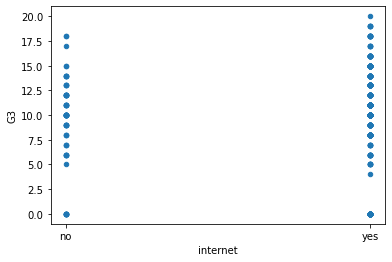

In [71]:
#plot of internet access vs G3 (final grade)
df.plot.scatter(x='internet',y='G3')

<AxesSubplot:xlabel='famrel', ylabel='G3'>

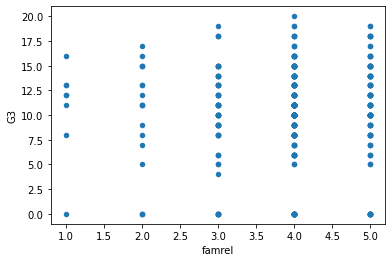

In [74]:
#plot of family relationship rated 1-5 (5 as best)vs G3 (final grade)
df.plot.scatter(x='famrel',y='G3')

<AxesSubplot:xlabel='Dalc', ylabel='G3'>

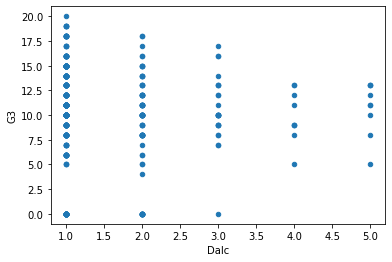

In [77]:
#plot of workday alcohol consumption vs G3 (final grade)
#slight relationship of higher workday alcohol consumption being correlated with lower final grades
df.plot.scatter(x='Dalc',y='G3')

<AxesSubplot:xlabel='absences', ylabel='G3'>

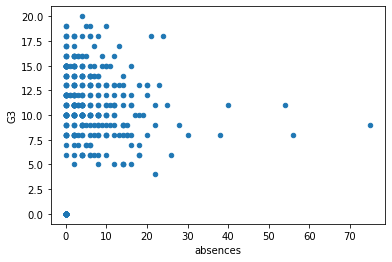

In [78]:
#plot of number of absences vs G3 (final grade)
df.plot.scatter(x='absences',y='G3')

<AxesSubplot:xlabel='Dalc', ylabel='absences'>

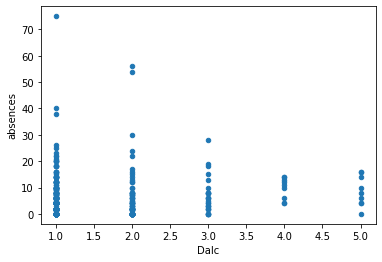

In [80]:
#plot of workday alcohol consumption vs number of absences
df.plot.scatter(x='Dalc',y='absences')

<AxesSubplot:xlabel='failures', ylabel='absences'>

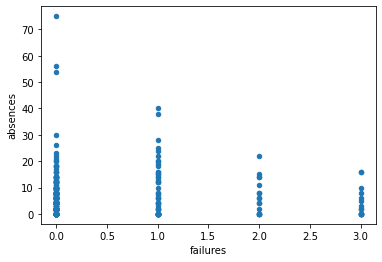

In [82]:
#plot of number of classes failed vs number of absences
df.plot.scatter(x='failures',y='absences')

<AxesSubplot:xlabel='age', ylabel='Dalc'>

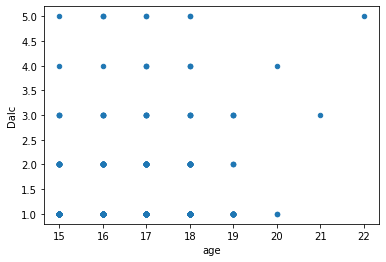

In [86]:
#plot of age vs workday alcohol consumption
df.plot.scatter(x='age',y='Dalc')

In [88]:
#perform linear regression model to explore relationship
#between number of classes failed vs final math grade
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [90]:
import sklearn.model_selection

In [93]:
x = df['failures']

In [94]:
#check x content
x

0      0
1      0
2      3
3      0
4      0
      ..
390    2
391    0
392    3
393    0
394    0
Name: failures, Length: 395, dtype: int64

In [95]:
y = df['G3']

In [96]:
#split the model into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

In [97]:
x_train.shape

(316,)

In [101]:
x_train = x_train.values

In [98]:
x_test.shape

(79,)

In [104]:
x_test = x_test.values

In [105]:
#reshape in order to perform regression
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [106]:
model.fit(x_train,y_train)

LinearRegression()

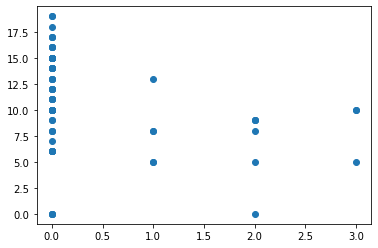

In [ ]:
plt.scatter(x_test,y_test)

In [113]:
y_pred = model.predict(x_test)

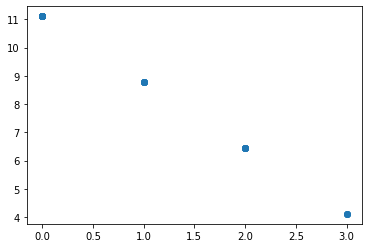

In [115]:
plt.scatter(x_test,y_pred)

In [119]:
#evaluate quality of model
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = ', mean_squared_error(y_test, model.predict(x_test)))
print('R^2 = ', r2_score(y_test, model.predict(x_test)))

MSE =  18.875617962114454
R^2 =  0.07946479150473307


In [117]:
#perform cross-validated k-neighbor classifier model
import sklearn.neighbors

In [122]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [123]:
#calculate cross-validated MSE for k neighbors between 1 to 20
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    k_score = np.sqrt(-loss).mean()
    k_scores.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(k) + ' = ' + str(k_score))

Cross validated MSE for 1 = 6.2009103758473065
Cross validated MSE for 2 = 4.964538602430303
Cross validated MSE for 3 = 4.849980720732616
Cross validated MSE for 4 = 4.821228869328519
Cross validated MSE for 5 = 4.839751204214882
Cross validated MSE for 6 = 4.785332001071217
Cross validated MSE for 7 = 4.658282702356656
Cross validated MSE for 8 = 4.5378514515035935
Cross validated MSE for 9 = 4.475203409104553
Cross validated MSE for 10 = 4.4842557754675285
Cross validated MSE for 11 = 4.459586763200682
Cross validated MSE for 12 = 4.437765555087394
Cross validated MSE for 13 = 4.355908523294952
Cross validated MSE for 14 = 4.332043517840714
Cross validated MSE for 15 = 4.343367554248717
Cross validated MSE for 16 = 4.320721027497146
Cross validated MSE for 17 = 4.31282307147065
Cross validated MSE for 18 = 4.32849318085544
Cross validated MSE for 19 = 4.325436556537087


In [124]:
#determine the lowest MSE
min(k_scores)

4.31282307147065

In [125]:
#set the optimized number of neighbors, 17, and fit the model onto training data
kNeighborModel = sklearn.neighbors.KNeighborsRegressor(n_neighbors=17)
kNeighborModel.fit(x_train, y_train)

#predict y using testing x test group
y_kNeighborPred = kNeighborModel.predict(x_test)

In [126]:
#evaluate error
print('MSE_knn = ', mean_squared_error(y_test, y_kNeighborPred))

MSE_knn =  18.418378520432746


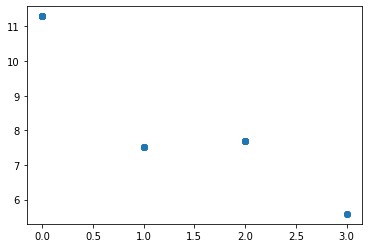

In [129]:
plt.scatter(x_test,y_kNeighborPred)

In [ ]:
#The k-neighbor classifier model has a slightly lower MSE than the linear regression model

#Confirm: the variables under examinsation being discrete makes classifying more appropriate of an approach?